# CS349-02: Python numerical computing 

This notebook goes over some useful functionalities in NumPy and SciPy. 
It also demonstrates how different ways of implementing the same procedure affect speed.

Understanding of basic Python and the NumPy tutorial in `PS0` is assumed,
but we will review highlight key points and some of the questions you had from that tutorial.

## NumPy Arrays

We import the `numpy` library. Python lets us choose our own namespace for the module using the `as` keyword.
Since "numpy" is a bit long to keep typing out, we'll call it `np`.

In [1]:
import numpy as np

a = np.array([1, 2, 3])

print 'a is the array\n', a
print 'a is of type', type(a)
print 'a has', a.ndim, 'dimensions'

a is the array
[1 2 3]
a is of type <type 'numpy.ndarray'>
a has 1 dimensions


In [2]:
b = np.zeros((4, 3), dtype=int)  #dtype could int, float, etc
b[0, 1] = 2  # note indexing looks different from Python's lists of lists
b[1, 2] = 5
b[2, 0] = 1

print 'b is the array\n', b
print 'b is of type', type(b)
print 'b has', b.ndim, 'dimensions'
print 'The element in row 1, column 1 is', b[1, 1]

b is the array
[[0 2 0]
 [0 0 5]
 [1 0 0]
 [0 0 0]]
b is of type <type 'numpy.ndarray'>
b has 2 dimensions
The element in row 1, column 1 is 0


The PS0 tutorial calls the number of dimensions of an array its "rank", but I prefer to just call it *number of dimensions*.

1 and 2 dimensional arrays are most commonly used. 1-d arrays tend to represent vectors (of the same number of dimensions as the elements in the vector), and which 2-d arrays tend to represent matrices.

However, arrays can have any number of dimensions. 

Below, `c` is a three dimensional array. It is displayed as 2 2-d cross-sections. You can think of `c` as 3-dimensional box; each 2-d array shown is a cross-section of the box.

3-dimensional arrays are often used to represent images, which are 2-d arrays of pixels, where each pixel has 3 (red, blue, green) values.

In PS1, your images are grayscale and therefore represented by 2-d arrays only, where each pixel has an intensity value rather than color.


**Do not mix up the number of dimensions of an array, and the dimensionality of a vector (represented as a 1-d array).**

In [3]:
c = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]], dtype=float)
print c
print 'The shape of c is', c.shape

[[[  1.   2.   3.]
  [  4.   5.   6.]
  [  7.   8.   9.]]

 [[ 10.  11.  12.]
  [ 13.  14.  15.]
  [ 16.  17.  18.]]]
The shape of c is (2, 3, 3)


### Vector and Matrix Arithmetic

Arrays of the same shape can be added. Multiplying with `*` does element-wise multiplication, not dot-product.

From the vectors worksheet on Monday:

In [4]:
print 'VECTOR BASICS'
a = np.array([5, 4])
b = np.array([1, 1])
print 'a =', a
print 'b =', b
print 'a+b =', a+b
print 'a-b =', a-b
print 'a*b =', a*b # element-wise; not the dot product. note that we rarely need element-wise vector multiplication
print 'a.b =', a.dot(b)

VECTOR BASICS
a = [5 4]
b = [1 1]
a+b = [6 5]
a-b = [4 3]
a*b = [5 4]
a.b = 9


**Exercise**: If numpy did not provide a `dot` method, and only provided element-wise multiplication through `*`, how would you compute the dot product? Hint: use `np.sum` (or even just Python's built-in `sum`).

In [5]:
print 'a.b =', np.sum(a*b)

a.b = 9


Last class, we discussed different metrics to compute distances between points.

In [6]:
import numpy.linalg  #for Lp distances and norms
print 'The L0 (hamming) distance between a and b is', numpy.linalg.norm(a-b, 0)  
print 'The L0 (hamming) distance between a and [5, 1] is', numpy.linalg.norm(a-np.array([5, 1]), 0)  
print 'The L1 (manhattan) distance between a and b is', numpy.linalg.norm(a-b, 1)

The L0 (hamming) distance between a and b is 2
The L0 (hamming) distance between a and [5, 1] is 1
The L1 (manhattan) distance between a and b is 7


**Exercise**: 

1. We've already seen the definition of L1 distance in class.
What is your guess for the definition of the L0 (Hamming) distance?

2. Write the expression to compute the Euclidean distance below.

In [8]:
print 'The L2 (euclidean) distance between a and b is', numpy.linalg.norm(a-b, 2)

The L2 (euclidean) distance between a and b is 5.0


We can compute cosine similarity following the formula in terms of the dot product and L2 norm.

In [9]:
print 'COSINE SIMILARITY'
cosab = a.dot(b)/(numpy.linalg.norm(a)*numpy.linalg.norm(b))
print 'cosine similarity between a and b is', cosab
print 'angle between a and b is', np.degrees(np.arccos(cosab)), 'degrees'

c = np.array([-2, 2.5])
print 'cosine similarity between a and c is', a.dot(c)/(numpy.linalg.norm(a)*numpy.linalg.norm(c))

COSINE SIMILARITY
cosine similarity between a and b is 0.993883734674
angle between a and b is 6.34019174591 degrees
cosine similarity between a and c is 0.0


Matrices

In [10]:
X = np.array([[2, 0, 1], [0, 1, -1]])
Y = np.array([[2], [1], [0]])

print 'X is', 
print X
print 'Y is', 
print Y

print 'X.Y is',
print X.dot(Y)

print 'The transpose of X is'
print X.T

print 'Y.X is',
print Y.dot(X)

X is [[ 2  0  1]
 [ 0  1 -1]]
Y is [[2]
 [1]
 [0]]
X.Y is [[4]
 [1]]
The transpose of X is
[[ 2  0]
 [ 0  1]
 [ 1 -1]]
Y.X is

ValueError: shapes (3,1) and (2,3) not aligned: 1 (dim 1) != 2 (dim 0)

In [11]:
print 'X.XT is', X.dot(X.T)

 X.XT is [[ 5 -1]
 [-1  2]]


**Exercise:** write the expression to compute $X.X^T$

### Indexing and Slicing

I can take continuous subarrays of any array using *slicing*.

In [13]:
sixes = np.full((3, 4), 6, dtype=int)
sixes[1, :] = 2
sixes[:2, 3] = 5
sixes[2, 1] = 0
print sixes
print
print sixes[1:, 1:3]  # rows 1-end and columns 1-3 of b

[[6 6 6 5]
 [2 2 2 5]
 [6 0 6 6]]

[[2 2]
 [0 6]]


What if I want a subarray that is *not* continuous? E.g., row 0 col 3 and row 2 col 1 of `b`. Enter **integer indexing**.

In [14]:
print sixes[[0, 2], [3, 1]]  #first list is list of row indices, second list is corresponding column indices

[5 0]


**Exercise:** use integer indexing to get the last two elements of row 1 from `sixes` and the element at row 2 col 1. (i.e., the returned array should be `[2 5 0]`

In [15]:
print sixes[[1,1,2],[2,3,1]]

[2 5 0]


**Boolean array indexing** uses a boolean array of the same shape as the original array to select elements of the array. 

In [16]:
print 'a is\n', a
mymask1 = np.array([True, False])
print 'Applying boolean indexing with mymask1 on a:', a[mymask1]

print '\nsixes is\n', sixes
mymask2 = np.array([[True, True, False, True], [False, True, True, False], [False, False, True, False]])
print 'Applying boolean indexing with mymask2 on sixes:', sixes[mymask2]

a is
[5 4]
Applying boolean indexing with mymask1 on a: [5]

sixes is
[[6 6 6 5]
 [2 2 2 5]
 [6 0 6 6]]
Applying boolean indexing with mymask2 on sixes: [6 6 5 2 2 6]


Note that a relational operator produces a mask by testing that relation on each element of the array, unlike regular Python.

These can be used for easy indexing.

In [17]:
print a%2==0
print a[a%2==0]

[False  True]
[4]


**Exercise**: Write an expression below using boolean indexing to retrieve the elements of `sixes` that are not 6.

In [21]:
print sixes != 6

[[False False False  True]
 [ True  True  True  True]
 [False  True False False]]


### Reshaping

Arrays can be reshaped as long as the total number of elements remains the same.

For example, you can convert a `(2, 3)` array into a `(6, 1)`, `(3, 2)`, or `(1, 6)`.

A student was wondering what the difference is between reshaping and transposing. What does reshaping do?

In [22]:
q = np.array([[1, 2, 3], [4, 5, 6]])
print 'q:\n', q
print 'q reshaped to (1, 6):\n', q.reshape((1, 6))
print 'q reshaped to (3, 2):\n', q.reshape((3, 2))
print 'q transposed:\n', q.T

q:
[[1 2 3]
 [4 5 6]]
q reshaped to (1, 6):
[[1 2 3 4 5 6]]
q reshaped to (3, 2):
[[1 2]
 [3 4]
 [5 6]]
q transposed:
[[1 4]
 [2 5]
 [3 6]]


### Broadcasting

Most of the questions you had about PS0 were about broadcasting. 

This is just a fancy term for how numpy will implicitly "tile" the smaller array to match the dimensions of the larger array before applying an arithmetic operation. Only some "univeral" NumPy operations support broadcasting.

Here's a [reference](http://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/) about how broadcasting works. It's not too important for this class to understand all the details.

In [23]:
print 'sixes:\n', sixes
print 'shape of b:', sixes.shape
x = np.array([10, 100, 1000, 1])
print 'x:\n', x
print 'shape of x:', x.shape

sixes:
[[6 6 6 5]
 [2 2 2 5]
 [6 0 6 6]]
shape of b: (3, 4)
x:
[  10  100 1000    1]
shape of x: (4,)


In [24]:
print x+sixes # tiles x across the rows of b and adds

[[  16  106 1006    6]
 [  12  102 1002    6]
 [  16  100 1006    7]]


Scalar vector multiplication in NumPy is a special case of broadcasting.

In [25]:
print 3*x   # 3 has shape (1,) while x has shape (4,)

[  30  300 3000    3]


In [26]:
y = np.array([3, 2, -1]).reshape((3, 1))   # 1-d array's transpose doesn't give expected shape. must reshape instead
print 'y:\n', y
print 'shape of y:', y.shape
print y*sixes

y:
[[ 3]
 [ 2]
 [-1]]
shape of y: (3, 1)
[[18 18 18 15]
 [ 4  4  4 10]
 [-6  0 -6 -6]]


### Images as Arrays

Grayscale images can be represented as 2-d arrays of pixel intensities. The file `7.txt` in this directory contains an array representation of 7.

To display an array as an image, we will use `matplotlib`. Here is the `display_image` function provided to you in PS1.

(28, 28)


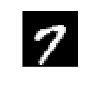

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline  
# above line only needed in notebooks
def display_image(arr, saveToFilename=None):
    """Given an array, display it as a 2d grayscale image.
    If saveToFilename is provided (str), save the image to a file of that name."""
    plt.figure(figsize=(1, 1))
    plt.axis('off')
    plt.imshow(arr, interpolation='none', cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    if saveToFilename:
        plt.savefig(saveToFilename)
    else:
        plt.show()
        
# use np.loadtxt to read the array from the file, and display_image to show the image represented by the array
img7 = np.loadtxt('7.txt', dtype=int)
print img7.shape
display_image(img7)

**Exercise**: write an expression to count the proportion of fully black pixels in this image.
Black pixels have an intensity of 0. Hint: boolean indexing.

In [29]:
print np.sum(img7==0)

640


**Exercise**: display the image corresponding to the transpose of the original image array.

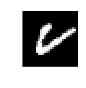

In [30]:
display_image(img7.T)

**Exercise**: display the image corresponding to the array where the pixel intensities are "flipped";
i.e. 7 should show up as a black figure on a white background.
Hint: 255 is the largest white value.

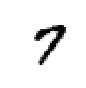

In [41]:
display_image(np.absolute(img7-255))

**Binarizing**

Below, we create a copy of `img7` where any pixel above an intensity threshold of 50 is pure white, while the rest are black. 

We use boolean indexing which produces a boolean mask of the same shape as the original, convert it to an array of integers (where False=0 and True=1), and scale all values by 255 (so that 1 becomes 255).

This produces a pure b&w image, where every pixel is either 0 or 255, as opposed to a grayscale image. Such binarzing (of any data, not only images) is common in machine learning.

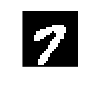

In [42]:
bwimg7 = (img7>30).astype(int)*255
display_image(bwimg7)

### Speed

Besides the nice indexing, slicing, and arithmetic capabilities of NumPy, we prefer it over pure Python for speed.

**Task:** given two matrices `A` and `B` with rows representing vectors, compute the dot products between all points in `A` and all points in `B`. Store in a new matrix `P` where `P[i, j]` is the distances between `A[i]` and `B[j]`.

In [43]:
import time
A = np.random.rand(300, 5000)  # 300 vectors of 5000 dimensions each
B = np.random.rand(150, 5000)  # 150 vectors of 5000 dimensions each
print A.shape, B.shape
print A[:5, :5]

(300, 5000) (150, 5000)
[[ 0.38565834  0.73518909  0.12924323  0.89530369  0.88057753]
 [ 0.84452658  0.34467043  0.46831573  0.66055633  0.85531967]
 [ 0.78862409  0.00592957  0.14457982  0.49665328  0.68358762]
 [ 0.88516131  0.93977588  0.38376322  0.25976687  0.16285405]
 [ 0.19222773  0.20022368  0.2093084   0.15560847  0.3182888 ]]


#### Implementation 1: Pure Python

In [44]:
def pairwise_dot_python(A, B):
    start = time.time()
    P = []
    for i in range(A.shape[0]):  # rows of A
        P.append([])
        for j in range(B.shape[0]): # rows of B
            thisdotprod = 0.
            for d in range(A.shape[1]):  # columns (vector dims) 
                thisdotprod += A[i, d]*B[j, d]   # this is the arithmetic definition of the dot product
            P[-1].append(thisdotprod)
    P = np.array(P)
    print time.time()-start, 'seconds'
    return P

P_python = pairwise_dot_python(A, B)

98.0709660053 seconds


#### Implementation 2: Mix of Python loops and NumPy

The code below uses NumPy to compute dot products, but still uses a for-loop to go through all pairs of vectors.

In [45]:
def pairwise_dot_hybrid(A, B):
    start = time.time()
    P = []
    for i in range(A.shape[0]):  # rows of A
        P.append([])
        for j in range(B.shape[0]): # rows of B
            P[-1].append(A[i, :].dot(B[j, :]))
    P = np.array(P)
    print time.time()-start, 'seconds'
    return P

P_hybrid = pairwise_dot_hybrid(A, B)

0.281105041504 seconds


#### Implementation 3: Pure NumPy

Finally, the code below uses no for-loops or lists.

In [46]:
def pairwise_dot_numpy(A, B):
    start = time.time()
    P = A.dot(B.T)
    print time.time()-start, 'seconds'
    return P

P_numpy = pairwise_dot_numpy(A, B)

0.014582157135 seconds


Correctness check: the code below will print out any values of `P_numpy` that differ from the others. (Do you understand the syntax of the two statements?)

Why do you think we needed to round the floating point values?

In [47]:
print P_numpy[np.round(P_numpy, 4) != np.round(P_hybrid, 4)]
print P_numpy[np.round(P_numpy, 4) != np.round(P_python, 4)]

[]
[]


### SciPy's distance computations

Unfortunately, dot products are only useful for fast pairwise cosine similarities. How do we calculate pairwise Euclidean distances for all pairs of points? 

Use SciPy's distance module which provides the `pdist` (pairwise distances between all row-vectors in a single matrix) and `cdist` (pairwise distances between row-vectors in two matrices).

Make sure you understand the pure Python implementation first so you know what is being calculated. This is closer to "pseudocode" and therefore more transparent about the underlying algorithm that the `scipy` abstraction.

In [48]:
def pairwise_euclid_python(A, B):
    start = time.time()
    P = []
    for i in range(A.shape[0]):  # rows of A
        P.append([])
        for j in range(B.shape[0]): # rows of B
            thisdist = 0.
            for d in range(A.shape[1]):  # columns (vector dims) 
                thisdist += (A[i, d]-B[j, d])**2   # this is the arithmetic definition of euclidean distance
            P[-1].append(np.sqrt(thisdist))
    P = np.array(P)
    print time.time()-start, 'seconds'
    return P

P_python = pairwise_euclid_python(A, B)

138.847877026 seconds


In [49]:
from scipy.spatial.distance import cdist
def pairwise_euclid_scipy(A, B):
    start = time.time()
    P = cdist(A, B)
    print time.time()-start, 'seconds'
    return P

P_scipy = pairwise_euclid_scipy(A, B)

0.230077028275 seconds


**Exercise:** Define `pairwise_euclid_hybrid` below, using for-loops instead of `cdist` to get each pair of vectors just like `pairwise_euclid_python` above, but using `numpy.linalg.norm` as we did earlier to compute the Euclidean distance between two vectors instead of explicitly computing it with a loop over the dimensions.

In [51]:
import numpy.linalg
def pairwise_euclid_hybrid(A, B):
    start = time.time()
    # fill in
    P = numpy.linalg.norm(A-B, 2)
    print time.time()-start, 'seconds'
    return P